In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train = np.array(train)
test = np.array(test)

train_x = train[:, 1:]
train_y = train[:, 0]

# Normalize the data
train_x = train_x / 255.0
test = test / 255.0



In [8]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#Reshape
train_x = train_x.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

In [12]:
train_y

array([1, 0, 1, ..., 7, 6, 9])

In [13]:
train_y = to_categorical(train_y)

In [14]:
train_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
print(train_x.shape)

(42000, 28, 28, 1)


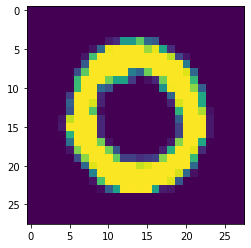

In [19]:
g = plt.imshow(train_x[1][:,:,0])

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [27]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
#Trying RMSProp optimizer

optimizer_rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer_rms , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
BATCH_SIZE=64
EPOCH=5

In [29]:
history = model.fit(train_x, train_y, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=0.2, shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 126s 4ms/sample - loss: 0.2354 - accuracy: 0.9255 - val_loss: 0.0603 - val_accuracy: 0.9800
Epoch 2/5
33600/33600 [==============================] - 124s 4ms/sample - loss: 0.0771 - accuracy: 0.9762 - val_loss: 0.0441 - val_accuracy: 0.9873
Epoch 3/5
33600/33600 [==============================] - 124s 4ms/sample - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 4/5
33600/33600 [==============================] - 124s 4ms/sample - loss: 0.0507 - accuracy: 0.9854 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 5/5
33600/33600 [==============================] - 124s 4ms/sample - loss: 0.0450 - accuracy: 0.9870 - val_loss: 0.0354 - val_accuracy: 0.9907


In [31]:
from tensorflow.keras.optimizers import Adam
optimizer_adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adam')
# Compile the model
model.compile(optimizer = optimizer_adam , loss = "categorical_crossentropy", metrics=["accuracy"])
# Since target variable has multiple classes, loss fnctn can be categorical cross entropy only
history_adam = model.fit(train_x, train_y, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=0.2, shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 123s 4ms/sample - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0333 - val_accuracy: 0.9895
Epoch 2/5
33600/33600 [==============================] - 123s 4ms/sample - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 3/5
33600/33600 [==============================] - 124s 4ms/sample - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0328 - val_accuracy: 0.9913
Epoch 4/5
33600/33600 [==============================] - 123s 4ms/sample - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0348 - val_accuracy: 0.9910
Epoch 5/5
33600/33600 [==============================] - 129s 4ms/sample - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0275 - val_accuracy: 0.9921


In [32]:
#Stochastic gradient with momentum and Nesterov
#we can slo use momentum optimzer (sgd+momentum)
from tensorflow.keras.optimizers import SGD
optimizer_sgd=SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name='SGD')
model.compile(optimizer = optimizer_sgd , loss = "categorical_crossentropy", metrics=["accuracy"])
history_sgd = model.fit(train_x, train_y, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=0.2, shuffle=True)
    

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 124s 4ms/sample - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0333 - val_accuracy: 0.9927
Epoch 2/5
33600/33600 [==============================] - 123s 4ms/sample - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0410 - val_accuracy: 0.9927
Epoch 3/5
33600/33600 [==============================] - 123s 4ms/sample - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0361 - val_accuracy: 0.9931
Epoch 4/5
33600/33600 [==============================] - 134s 4ms/sample - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0382 - val_accuracy: 0.9931
Epoch 5/5
33600/33600 [==============================] - 123s 4ms/sample - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0328 - val_accuracy: 0.9931


**SGD Optimizer proves to be the best one, **
**Loss consistently reduced during each iteration**